In [118]:
import numpy as np # importing numpy for work with matrices
import csv # importing csv to work with train_masks.csv
import random
from time import gmtime, strftime # importing some stuff from time to check the speed for algorithm

import matplotlib.pyplot as plt

%matplotlib inline

TIF = ".tif"
MASK_TIF = "_mask.tif"

V_TEST = 420
H_TEST = 580

V_FRAME = 212
H_FRAME = 256

V_DELTA = 13 # == (420 - 212) / 16
H_DELTA = 12 # == (580 - 256) / 27

patient = np.array([17, 20,  2,  5, 40, 29, 44, 38, 37])

In [2]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

test = []
train = []

with np.load('input/frames.npz', mmap_mode='r') as data:
    for name in data:
        if 'mask' not in name:
            if int(name[:name.find('_')]) in patient:
                test.append(name)
                
with np.load('input/cluster_data.npz', mmap_mode='r') as data:
    for name in data:
        if 'mask' not in name:
            train.append(name)
                        
print(len(test), len(train))

print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

2016-08-08 11:25:30
441 326
2016-08-08 11:25:30


In [4]:
test = np.array(test)
train = np.array(train)

In [85]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

with np.load("input/train_data.npz", mmap_mode='r') as data:
    test_im = np.array([data[image_name + TIF] for image_name in test])
    
with np.load("input/cluster_data.npz", mmap_mode='r') as data:
    train_im = np.array([data[image_name] for image_name in train])
    
print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

2016-08-08 13:36:25
2016-08-08 13:36:31


In [20]:
def distance(x, y):
    return np.sqrt(((x.flatten() - y.flatten()) ** 2).sum())

def dice_coefficient(x, y):
    if not(x.any() or y.any()):
        return 1
    return 2 * (x * y).sum() / (x.sum() + y.sum())

In [119]:
dist = np.full(len(test), np.inf)
v_coord = np.zeros((len(test), ))
h_coord = np.zeros((len(test), ))
neighbor = np.array([])
for i in range(len(test)):
    neighbor = np.append(neighbor, "str")

In [127]:
with open("csv/cluster results.csv", "w") as output:
    writer = csv.writer(output)
    writer.writerow(['img', 'cluster', 'dist', 'v_coord', 'h_coord'])
    for i in range(len(test)):
        writer.writerow([test[i], neighbor[i], dist[i], v_coord[i], h_coord[i]])

In [120]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

for i in range(len(test)):  
    
    ver = 0
    while (ver + V_FRAME < V_TEST):

        hor = 0
        while (hor + H_FRAME < H_TEST):

            im = test_im[i][ver : ver + V_FRAME, hor : hor + H_FRAME]
            im = im / im.mean() * 110    

            for k in range(len(train)):

                d = distance(train_im[k], im)

                if d < dist[i]:
                    dist[i] = d
                    neighbor[i] = train[k]
                    v_coord[i] = ver
                    h_coord[i] = hor

            hor += H_DELTA

        ver += V_DELTA

print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

2016-08-08 16:46:02
2016-08-09 12:46:53


In [121]:
im1 = []

with np.load("input/train_data.npz", mmap_mode='r') as data:
    for i in range(len(test)):
        im = data[test[i] + MASK_TIF]
        im[im == 255] = 1  
        im1.append(im)

In [122]:
im2 = []
        
with np.load("input/cluster_data.npz", mmap_mode='r') as data:
    for i in range(len(test)):  
        im = np.zeros((V_TEST, H_TEST))
        im[v_coord[i] : v_coord[i] + V_FRAME, h_coord[i] : h_coord[i] + H_FRAME] += data[neighbor[i] + "_mask1"]
        assert im.max() == 1
        im2.append(im)

C:\Soft\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [123]:
coef = np.full(len(test), np.inf)

for i in range(len(test)): 
    coef[i] = dice_coefficient(im1[i], im2[i])

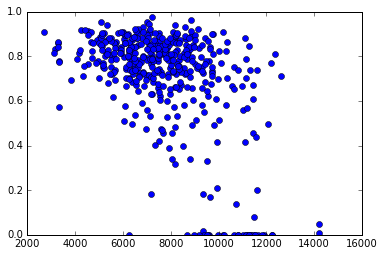

In [126]:
plt.plot(dist, coef, 'bo')
plt.show()

In [125]:
coef.mean(), coef.max(), coef[coef != 0].min()

(0.70187726766850889, 0.97388995427054137, 0.0096240888084234595)

In [63]:
real_dist = np.full(len(test), np.inf)
real_neighbor = np.array([])
for i in range(len(test)):
    real_neighbor = np.append(real_neighbor, "str")

In [64]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

for i in range(len(test)):
    for k in range(len(train)):
        d = distance(train_im[k], test_im[i])
        if d < real_dist[i]:
            real_dist[i] = d
            real_neighbor[i] = train[k]
                    
print(strftime("%Y-%m-%d %H:%M:%S", gmtime())) # don't forget to add 3 hours

2016-08-08 13:22:45
2016-08-08 13:25:21


In [80]:
rim1 = []

with np.load("input/frames.npz", mmap_mode='r') as data:
    for i in range(len(test)):
        rim = data[test[i] + '_mask']
        rim[rim == 255] = 1  
        assert rim.max() == 1
        assert rim[rim != 1].max() == 0
        rim1.append(rim)
        
rim2 = []
        
with np.load("input/cluster_data.npz", mmap_mode='r') as data:
    for i in range(len(test)):  
        rim = data[real_neighbor[i] + '_mask1']
        assert rim.max() == 1
        assert rim[rim != 1].max() == 0
        rim2.append(rim)

In [81]:
real_coef = np.full(len(test), np.inf)

for i in range(len(test)): 
    real_coef[i] = dice_coefficient(rim1[i], rim2[i])

In [82]:
real_coef.max(), real_coef.min(), real_coef.mean()

(1.0, 0.36723801703787334, 0.82141959965084199)

In [95]:
diff = real_dist - dist

In [97]:
dist.max()

15077.673718514337

In [98]:
real_dist.max()

15205.0358709752